## Getting Started with Machine Learning

### Algorithms:
#### ordered set of unambigious instructions to process some tasks

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("../Datasets/diabetes.csv")

In [5]:
df.head(5)

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
cols=list(df.columns) 
print(cols)

['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age', 'label']


In [7]:
df.shape

(768, 9)

<Axes: >

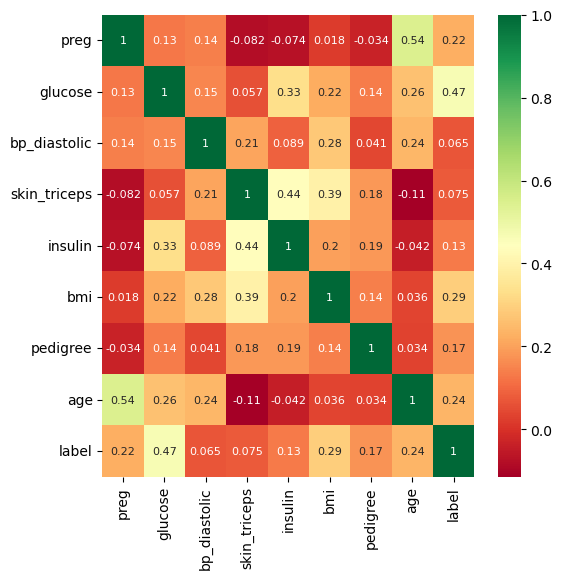

In [8]:
#get correlations of each features in datoset
corrmat = df.corr() 
top_corr_features = corrmat.index 
plt.figure(figsize=(6,6)) 
#plot heat map 
sns.heatmap(df[top_corr_features].corr(), annot= True, cmap="RdYlGn", annot_kws={'fontsize':8})

In [17]:
feature_cols = ['preg','glucose','insulin','bmi','pedigree','age']
print(feature_cols)

['preg', 'glucose', 'insulin', 'bmi', 'pedigree', 'age']


In [22]:
from sklearn.model_selection import train_test_split

In [26]:
# dataframe
x = df[feature_cols] # features/independant variable
y = df.label # target col/dependant variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)

In [28]:
len(y_train)

576

In [30]:
len(y_test)

192

In [32]:
from sklearn.tree import DecisionTreeClassifier
# Creating Decision Tree Classifier Object

clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [34]:
# Train Classifier 
model = clf.fit(x_train,y_train)

In [36]:
# Predict the response for test dataset
y_pred = model.predict(x_test)

In [38]:
len(y_pred)

192

In [48]:
y = pd.DataFrame({'Orignal' : y_test , 'Predicted' : y_pred})
y.head()

,Orignal,Predicted
226,0,0
610,0,0
505,0,0
470,0,1
474,0,0


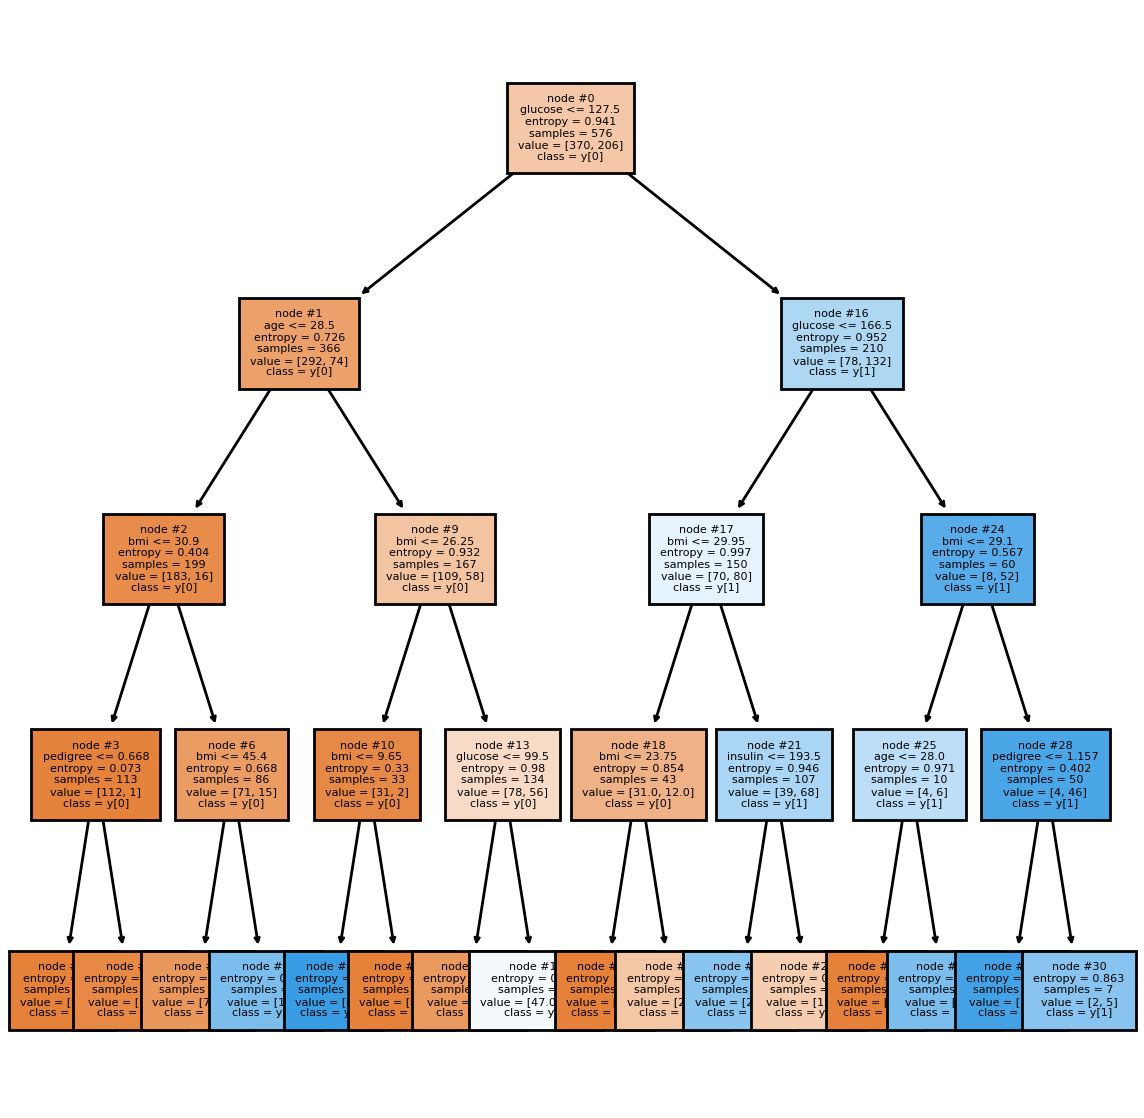

In [46]:
from sklearn import tree

# Plot decision tree with customizations
plt.figure(figsize=(7,7), dpi=200)
plt.title('Decision Tree Visualization')
tree.plot_tree(clf, filled=True, feature_names= x_train.columns, class_names=True, fontsize=4,
               max_depth=4, node_ids=True);

plt.show()

In [50]:
# Calculate Accuracy 
from sklearn import metrics 

In [52]:
result = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix')
print(result)

Confusion Matrix
[[107  23]
 [ 21  41]]


In [56]:
def plt1():
    import seaborn as sns; sns.set() 
    plt.figure(figsize=(4,4)) 
    c_mtrx = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']) 
    sns.heatmap(c_mtrx, annot=True, fmt = '.3g')

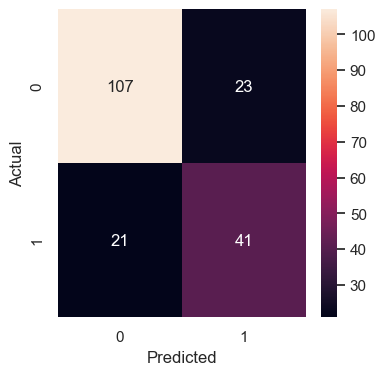

In [58]:
plt1()